In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error

In [25]:
# Loading the datasets
turbine_data = pd.read_csv('A1-turbine.txt', sep='\t', header=None, skiprows=1)
synthetic_data = pd.read_csv('A1-synthetic.txt', sep='\t', header=None, skiprows=1)

# Checking the first few rows of each dataset
turbine_data_head = turbine_data.head()
synthetic_data_head = synthetic_data.head()

# Displaying the basic information and first few rows of each dataset
turbine_data_head, synthetic_data_head, turbine_data.info(), synthetic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       451 non-null    float64
 1   1       451 non-null    float64
 2   2       451 non-null    float64
 3   3       451 non-null    float64
 4   4       451 non-null    float64
dtypes: float64(5)
memory usage: 17.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
 2   2       1000 non-null   float64
 3   3       1000 non-null   float64
 4   4       1000 non-null   float64
 5   5       1000 non-null   float64
 6   6       1000 non-null   float64
 7   7       1000 non-null   int64  
 8   8       1000 non-null   float64
 9   9       1000 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 78.

(       0      1       2    3        4
 0  624.0  89.16  89.765  3.5  2512.85
 1  628.0  93.16  93.765  3.5  2583.79
 2  602.0  67.84  66.415  6.5  3748.77
 3  599.0  64.84  63.415  6.5  3520.65
 4  630.0  94.69  93.540  8.0  6673.84,
            0          1         2         3           4         5          6  \
 0  37.344110  10.542156  0.969185  3.568534   96.798733  3.429026  75.810196   
 1   4.089849  11.894301  0.467775  1.279044  100.149383  3.190073  76.423095   
 2 -32.333439  10.968631  0.238486  1.410745  100.642075  3.093934  78.758727   
 3 -45.632977  11.509606  0.924938  3.404069  105.963016  2.884269  83.027750   
 4 -41.543394  10.117186  0.315180  1.020120   97.371423  2.815820  77.194463   
 
    7          8          9  
 0  0  20.002459  11.805369  
 1  0  12.702628   5.125025  
 2  1  10.723848   3.218553  
 3  0  19.946593  12.955092  
 4  0  11.105024   1.919094  ,
 None,
 None)

In [26]:
# Normalization/Standardization
scaler = StandardScaler()
# Normalize Turbine Data
turbine_data_normalized = scaler.fit_transform(turbine_data)
# Normalize Synthetic Data
synthetic_data_normalized = scaler.fit_transform(synthetic_data)

In [27]:
# Splitting the turbine data
turbine_train_val, turbine_test = train_test_split(
    turbine_data_normalized, test_size=0.15, random_state=42)

# Splitting the synthetic data
synthetic_train_val, synthetic_test = train_test_split(
    synthetic_data_normalized, test_size=0.20, random_state=42)

# Checking the sizes of the splits datasets
(turbine_train_val.shape, turbine_test.shape, synthetic_train_val.shape, synthetic_test.shape)

((383, 5), (68, 5), (800, 10), (200, 10))

In [28]:
import numpy as np

class SimpleNeuralNetworkAdjusted:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases with smaller initial values
        self.weights_input_to_hidden = np.random.randn(input_size, hidden_size) * 0.01
        self.bias_hidden = np.zeros(hidden_size)
        self.weights_hidden_to_output = np.random.randn(hidden_size, output_size) * 0.01
        self.bias_output = np.zeros(output_size)
        self.losses = []  # Store training loss at each epoch

    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return (x > 0) * 1

    def forward_pass(self, x):
        # Hidden layer
        hidden_layer_input = np.dot(x, self.weights_input_to_hidden) + self.bias_hidden
        hidden_layer_output = self.relu(hidden_layer_input)

        # Output layer (Linear)
        output_layer_input = np.dot(hidden_layer_output, self.weights_hidden_to_output) + self.bias_output
        output = output_layer_input
        return output, hidden_layer_output

    def backward_pass(self, x, y, output, hidden_output, learning_rate):
        # Calculate error
        error = output - y

        # Calculate gradients for output layer (linear)
        d_weights_hidden_to_output = np.dot(hidden_output.T, error)
        d_bias_output = np.sum(error, axis=0)

        # Calculate gradients for hidden layer (ReLU)
        d_hidden_layer = np.dot(error, self.weights_hidden_to_output.T) * self.relu_derivative(hidden_output)
        d_weights_input_to_hidden = np.dot(x.T, d_hidden_layer)
        d_bias_hidden = np.sum(d_hidden_layer, axis=0)

        # Update weights and biases
        self.weights_hidden_to_output -= learning_rate * d_weights_hidden_to_output
        self.bias_output -= learning_rate * d_bias_output
        self.weights_input_to_hidden -= learning_rate * d_weights_input_to_hidden
        self.bias_hidden -= learning_rate * d_bias_hidden

    def predict(self, x):
        output, _ = self.forward_pass(x)
        return output

    def train(self, x, y, learning_rate, epochs):
        for epoch in range(epochs):
            output, hidden_output = self.forward_pass(x)
            self.backward_pass(x, y, output, hidden_output, learning_rate)

            # Calculate and store the loss
            loss = np.mean((output - y) ** 2)
            self.losses.append(loss)

            # Printing the loss periodically
            if epoch % (epochs // 10) == 0 or epoch == epochs - 1:
                print(f"Epoch {epoch}, Loss: {loss}")

    def loss_epochs(self):
        return np.array(self.losses)

    def mean_absolute_percentage_error(self, y_true, y_pred):
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [29]:
# Turbine dataset
nn_turbine = SimpleNeuralNetworkAdjusted(input_size=4, hidden_size=10, output_size=1)  # Adjust input_size as per the number of features
nn_turbine.train(turbine_train_val[:, :-1], turbine_train_val[:, -1:], learning_rate=0.001, epochs=100)

Epoch 0, Loss: 1.0093024299527495
Epoch 10, Loss: 0.9743012433555243
Epoch 20, Loss: 0.11119537753927583
Epoch 30, Loss: 0.02188301019565258
Epoch 40, Loss: 0.02011459280038132
Epoch 50, Loss: 0.01876077704940295
Epoch 60, Loss: 0.01724269341120617
Epoch 70, Loss: 0.015475647689480454
Epoch 80, Loss: 0.013575992420455858
Epoch 90, Loss: 0.011409892949695848
Epoch 99, Loss: 0.00985840426212874


In [30]:
# Synthetic dataset
nn_synthetic = SimpleNeuralNetworkAdjusted(input_size=9, hidden_size=10, output_size=1)  # Adjust input_size as per the number of features
nn_synthetic.train(synthetic_train_val[:, :-1], synthetic_train_val[:, -1:], learning_rate=0.001, epochs=1000)

Epoch 0, Loss: 0.9817171675492764
Epoch 100, Loss: 0.1942885689836027
Epoch 200, Loss: 0.18848679773932075
Epoch 300, Loss: 0.1823955173319383
Epoch 400, Loss: 0.17785190791925612
Epoch 500, Loss: 0.17215775591929444


Epoch 600, Loss: 0.16299326125144958
Epoch 700, Loss: 0.15112416480938518
Epoch 800, Loss: 0.14002421150064123
Epoch 900, Loss: 0.13013419822881567
Epoch 999, Loss: 0.1225830208520917


In [31]:
predictions_turbine = nn_turbine.predict(turbine_test[:, :-1])
predictions_synthetic = nn_synthetic.predict(synthetic_test[:, :-1])

In [32]:
# For Turbine Data
mape_turbine = mean_absolute_percentage_error(turbine_test[:, -1], predictions_turbine)
mse_turbine = mean_squared_error(turbine_test[:, -1], predictions_turbine)
r2_turbine = r2_score(turbine_test[:, -1], predictions_turbine)

# For Synthetic Data
mape_synthetic = mean_absolute_percentage_error(synthetic_test[:, -1], predictions_synthetic)
mse_synthetic = mean_squared_error(synthetic_test[:, -1], predictions_synthetic)
r2_synthetic = r2_score(synthetic_test[:, -1], predictions_synthetic)


In [33]:
# Display Evaluation Metrics for Turbine Data
print("Turbine Data Evaluation Metrics:")
print(f"MSE: {mse_turbine:.4f}")
print(f"R2: {r2_turbine:.4f}")
print(f"MAPE: {mape_turbine:.4f}%")
print("\nExample Predictions for Turbine Data:")
for actual, predicted in zip(turbine_test[:5, -1], predictions_turbine[:5].flatten()):
    print(f"Actual: {actual:.4f}, Predicted: {predicted:.4f}")



Turbine Data Evaluation Metrics:
MSE: 0.0161
R2: 0.9821
MAPE: 0.3109%

Example Predictions for Turbine Data:
Actual: 1.5321, Predicted: 1.5758
Actual: -0.2554, Predicted: -0.3287
Actual: 0.7606, Predicted: 0.8843
Actual: 1.0643, Predicted: 1.0707
Actual: -0.8223, Predicted: -0.9693


In [34]:
# Display Evaluation Metrics for Synthetic Data
print("\nSynthetic Data Evaluation Metrics:")
print(f"MSE: {mse_synthetic:.4f}")
print(f"R2: {r2_synthetic:.4f}")
print(f"MAPE: {mape_synthetic:.4f}%")

# Display Example Predictions for Synthetic Data
print("\nExample Predictions for Synthetic Data:")
for actual, predicted in zip(synthetic_test[:5, -1], predictions_synthetic[:5].flatten()):
    print(f"Actual: {actual:.4f}, Predicted: {predicted:.4f}")



Synthetic Data Evaluation Metrics:
MSE: 0.1430
R2: 0.8651
MAPE: 0.7342%

Example Predictions for Synthetic Data:
Actual: 0.1092, Predicted: 0.4977
Actual: -0.7372, Predicted: -0.3748
Actual: -1.0207, Predicted: -0.4958
Actual: 2.1857, Predicted: 2.5665
Actual: -0.6370, Predicted: -0.4882


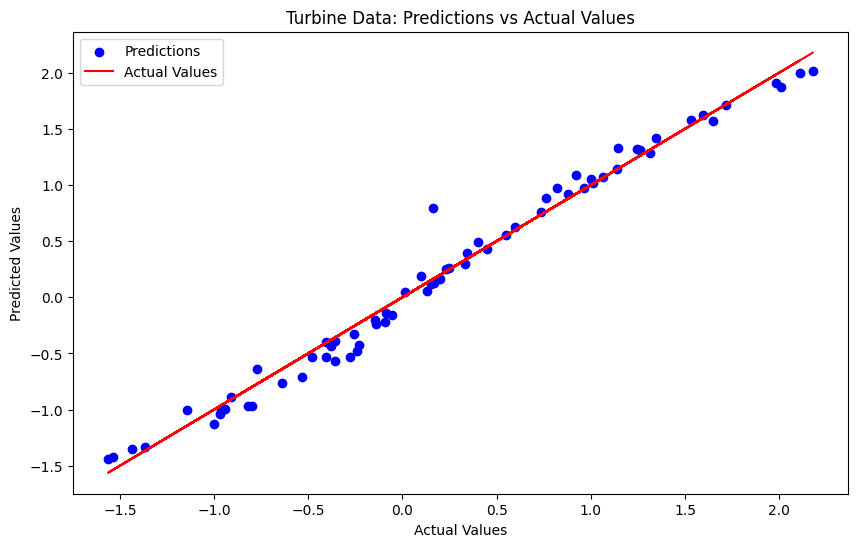

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(turbine_test[:, -1], predictions_turbine, color='blue', label='Predictions')
plt.plot(turbine_test[:, -1], turbine_test[:, -1], color='red', label='Actual Values')  # Ideal line
plt.title('Turbine Data: Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


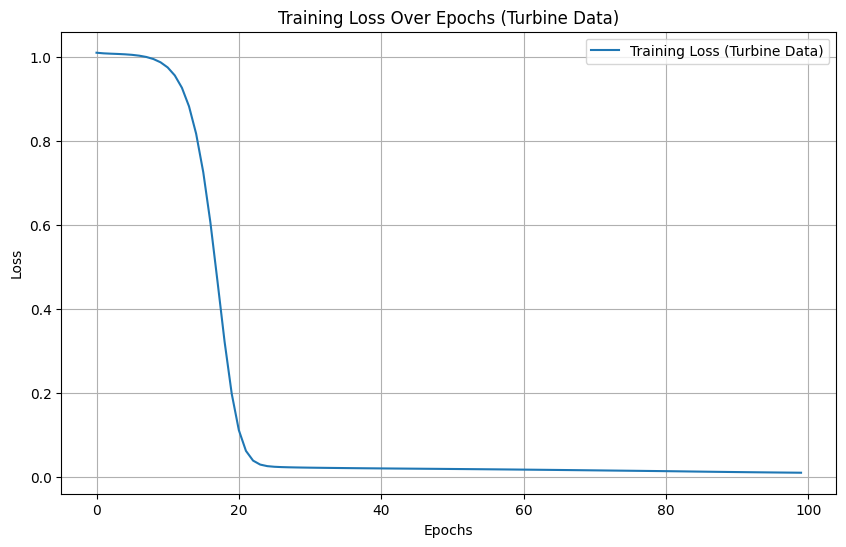

In [36]:

# Visualization of Training Loss Over Epochs for Turbine Data
train_loss_epochs_turbine = nn_turbine.loss_epochs()
plt.figure(figsize=(10, 6))
plt.plot(train_loss_epochs_turbine, label='Training Loss (Turbine Data)')
plt.title('Training Loss Over Epochs (Turbine Data)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


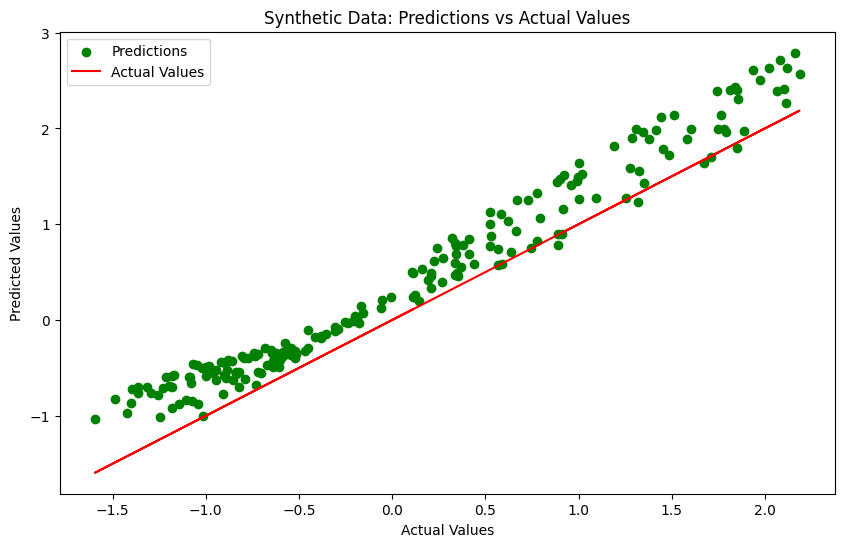

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(synthetic_test[:, -1], predictions_synthetic, color='green', label='Predictions')
plt.plot(synthetic_test[:, -1], synthetic_test[:, -1], color='red', label='Actual Values')  # Ideal line
plt.title('Synthetic Data: Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


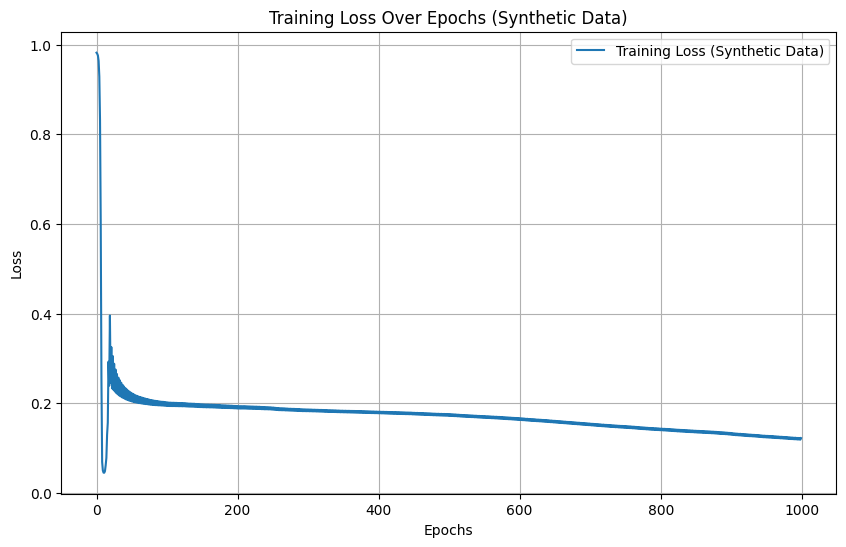

In [38]:

# Visualization of Training Loss Over Epochs for Synthetic Data
train_loss_epochs_synthetic = nn_synthetic.loss_epochs()
plt.figure(figsize=(10, 6))
plt.plot(train_loss_epochs_synthetic, label='Training Loss (Synthetic Data)')
plt.title('Training Loss Over Epochs (Synthetic Data)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()